<a href="https://colab.research.google.com/github/YogeshMaan/MAE598-Design-Optimization/blob/main/HW2_DesignOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# intial conditions

x0 = np.array([[1], [1]])
k = 0
epsilon = 10e-3
epoch = 10000


In [3]:
# define required function

def compute_gradient(x): # x (2, 1) column vector
  return np.array([[10*x[0][0] + 12*x[1][0] - 8], [12*x[0][0] + 20*x[1][0] - 14]])

def compute_inv_Hessian(x):
  hessian = np.array([[10, 12], [12, 20]])
  inv_hessian = np.linalg.inv(hessian)
  return inv_hessian

# Gradient Descent




In [4]:
x = x0
gd_Error = []
for i in range(epoch):
  grad_g = compute_gradient(x)
  x = x - .001*grad_g

  gd_Error.append(np.linalg.norm(grad_g))

  if np.linalg.norm(grad_g) < epsilon:
    break

print("Total Epochs:", i)
print("Error:", np.linalg.norm(grad_g))
print("Solution", x)


Total Epochs: 2555
Error: 0.009993383718879822
Solution [[-0.13870796]
 [ 0.78294816]]


Text(0.5, 0, 'Epochs')

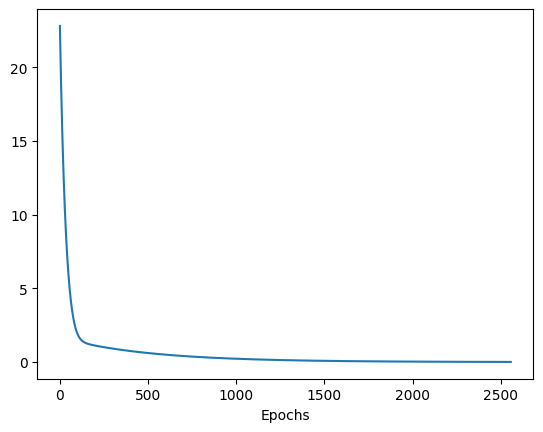

In [5]:
import matplotlib.pyplot as plt
gd_x = np.linspace(1, 2556, 2556)
plt.plot(gd_x, gd_Error)
plt.xlabel("Epochs")
plt.ylabel("Error")

# Newton's Method

In [10]:
x = x0
nm_Error = []
for i in range(epoch):
  grad_g = compute_gradient(x)
  H = compute_inv_Hessian(x)
  x = x - .001*np.matmul(H, grad_g)

  nm_Error.append(np.linalg.norm(grad_g))

  if np.linalg.norm(grad_g) < epsilon:
    break

print("Total Epochs:", i)
print("Error:", np.linalg.norm(grad_g))
print("Solution", x)

Total Epochs: 7729
Error: 0.00999217819570841
Solution [[-0.14235686]
 [ 0.78580809]]


7730


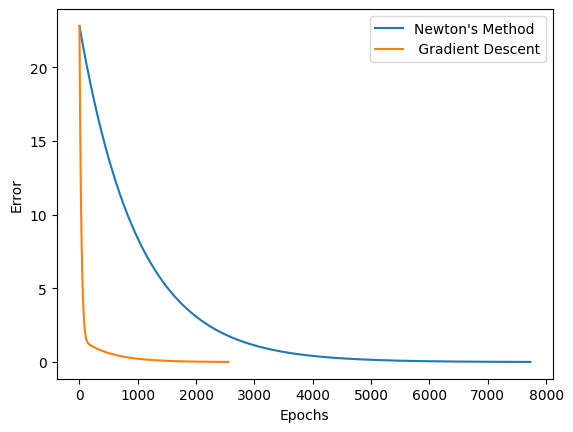

In [11]:
import matplotlib.pyplot as plt
print(len(nm_Error))
nm_x = np.linspace(1, len(nm_Error), len(nm_Error))
plt.plot(nm_x, nm_Error, label="Newton's Method")
plt.plot(gd_x, gd_Error, label= " Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()